In [1]:
# 處理 array
import numpy as np

# 產生隨機 list，用於隨機產生出一組合法解
import random

# data visualisation and manipulation
# 畫收斂圖
import matplotlib.pyplot as plt

In [2]:
# STEP 1 Initialization:
# 隨機產生出一組合法解 (至多2的100次方種可能解)

def ramdomSolution():
    # 隨機生成 100 bits 0/1 長度
    string_status = [ random.randint(0,1) for _ in range(n)]
    currentValue = 0
    
    for i in range(n):
        if(string_status[i] == 1):
            currentValue += 1
            
    return string_status, currentValue

In [3]:
# STEP 2 Transition: 產生一個或多個解 隨機 / 左右 移動
# 找鄰近解
# 採隨機移動 (1)將任一位置 0換成 1 1換成 0 
# 採左右移動 (2)將任兩不同值位置 0、1對調  

# STEP 3 Evaluation: 評估一個或多個解 適應值(Objective value)大小

def getNeighbor(solution, value):
    
    neightbor_sol = solution.copy()
    neighbor_value = value

    # 採隨機移動 (2)隨機找其中一個 bit 0換成 1 1換成 0 
        
    i = random.randint(0,n-1)

    # 多一個 1 
    if(neightbor_sol[i] == 0):

        neightbor_sol[i]=1
        neighbor_value += 1

    # 少一個 1 
    else: 
        neightbor_sol[i] = 0
        neighbor_value -= 1
 
    return neightbor_sol, neighbor_value
    
# n=4
# getNeighbor([0,1,1,0],2)


In [4]:
# STEP 4 Determination: 將 STEP 3 評估出的適應值與先前的進行比較
# 退火環節:
# 使用退火溫度(T)和適應值的差值(Δf)計算出允許機率，接著隨機一個0–1的浮點數(r)，若該隨機值(r)≤允許機率則進行更新

def simulatedAnnealing(current_sol, currrent_value):
    
    neightbor_sol, neighbor_value = getNeighbor(current_sol, currrent_value)
    #print("\n鄰近解: " + str(neightbor_sol))
    #print("鄰近解獲利: " + str(neighbor_value))

    # 鄰近解若優於或等於先前解則更新
    if(currrent_value <= neighbor_value):

        current_sol = neightbor_sol
        currrent_value = neighbor_value

    # 若差於先前解則進行退火環節
    else:

        # 隨機值(r:0~1的浮點數)
        r = random.random()

        # Δf < 0 ，故找最大值為: 鄰近解 - 先前解
        Δf = (neighbor_value - currrent_value)
        accept_p = np.exp( (neighbor_value - currrent_value) / current_temperature )

        #print("r,accept_p,Δf")
        #print(r,accept_p,Δf)

        # 隨機值(r:0~1的浮點數) ≤ 允許機率則接受差值進行更新
        # e的指數若是一個很小的負值，計算後的值會較接近1，差值較小的情形能有比較大的機率接受更新 
        if(r <= accept_p):
            current_sol = neightbor_sol
            currrent_value = neighbor_value
            #print("接受差值")
    
    return current_sol, currrent_value
    

In [5]:
def plotIteration(value_history, iteration):
    
    iterationTime = iteration

    plt.title('circle of average convergence')
    plt.plot(range(1, iterationTime + 1), value_history, label='Objective Value')
    plt.xlabel('Iteration')
    plt.ylabel('Objective Value')
    plt.legend()
    plt.grid()
    plt.show()

In [6]:
# STEP 0 Setting: 初始參數:

global n,iteration,run,current_temperature,Rₜ; 

# 100 bits
n = 100 

# 迭代次數(Iteration)
iteration = 1000

# 平均迭代1次 run 次數
run = 51

# 初始溫度(T) 退火溫度
current_temperature = 5.0

# 退火係數(Rₜ)
Rₜ = 0.95

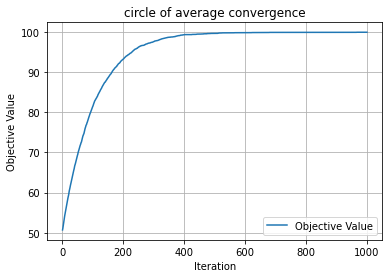

最佳解:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
最佳值:  100
最佳平均解值 100.0


In [7]:
# 採隨機移動 變數
# 採隨機移動 加總 51run 並計算平均
rand_avg_val = 0
rand_total_val = 0

# 紀錄每次採隨機移動迭代的值
rand_iteration_history = []

# 紀錄採隨機移動最佳解及最佳值
rand_best_sol = []
rand_best_value = 0

# 跑51次run平均1000次迭代
for i in range(run):
    
    # 新的一 run 先清空解暫存
    temp_history = []
    
    # STEP 1 Initial:
    # 隨機產生出一組合法解 
    rand_current_sol, rand_currrent_value = ramdomSolution()
    rand_best_sol, rand_best_value = rand_current_sol, rand_currrent_value

    # 迭代 1000 次停止
    for k in range(iteration):

        rand_current_sol, rand_currrent_value = simulatedAnnealing(rand_current_sol, rand_currrent_value)
        
        # 紀錄採隨機移動每次的值
        temp_history.append(rand_currrent_value)
        # 紀錄採隨機移動最佳解及最佳值
        if(rand_currrent_value > rand_best_value):
            rand_best_value = rand_currrent_value
            rand_best_sol = rand_current_sol

        # 每次迭代的最後皆需進行降溫動作(T = T * Rₜ)，會將溫度T乘上一個小於1的數值(Rₜ)，Rₜ的數值大小取決於想要的收斂速度
        # T (T = T * Rₜ) 會隨著迭代的進行而越來越小，從初始值1開始，隨著迭代不斷下降
        # Δf( Δf = 鄰近解 - 先前解) 除上一個小於1的值(T)，會將 Δf 的值放大，變成一個更大的負數
        # e的指數若是一個很大的負值，計算後的值會很接近 0，成功更新的機率變得更低
        current_temperature = current_temperature * Rₜ
        
    # 紀錄採隨機移動每次迭代的值
    rand_iteration_history.append(temp_history)

# list 轉 np array 方便平均計算
rand_value_history = np.array(rand_iteration_history)

# 加總每一行
rand_total_val = rand_value_history.sum(axis=0)
# 跑 51次平均值
rand_avg_val = rand_total_val / run

# 畫採隨機移動的平均收斂圖
plotIteration(rand_avg_val, iteration)
print("最佳解: ", rand_best_sol)
print("最佳值: " ,rand_best_value)
print("最佳平均解值",max(rand_avg_val)) 
    
